In [1]:
#ANNALYSE DE DONNEES AVEC PYTHON
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as st

#Serie temporelle
import statsmodels.formula.api as smf
import statsmodels.api as sm

from pandas.tseries.offsets import MonthEnd

#CALCUL DE METRICS OU PRECISON DU MODEL
from sklearn.metrics import mean_absolute_error, mean_squared_error

#GESTION DES AVERTISSEMENTS
import warnings
warnings.filterwarnings('ignore')
import scipy

In [5]:
# Assurez-vous que le chemin d'accès au fichier est correct
file_path = r"C:\Users\Novatiel_04\Desktop\Modelisation M1\Séance 1\CarPrice_Assignment.csv"

# Charger le fichier CSV en tant que DataFrame
data = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame pour vérifier si le chargement s'est bien déroulé
print(data.head())


   car_ID    price                   CarName fueltype aspiration doornumber  \
0       1  13495.0        alfa-romero giulia      gas        std        two   
1       2  16500.0       alfa-romero stelvio      gas        std        two   
2       3  16500.0  alfa-romero Quadrifoglio      gas        std        two   
3       4  13950.0               audi 100 ls      gas        std       four   
4       5  17450.0                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mp

In [6]:
#Analyse descriptive
data.describe()

,car_ID,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
count,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,82.50000,13358.272360,98.181707,172.859756,65.790244,53.520122,2531.865854,126.353659,3.315671,3.236829,9.910488,103.036585,5132.317073,25.310976,30.914634,0.920732
std,47.48684,8678.444389,6.238071,12.931916,2.285302,2.553409,554.269204,45.122294,0.271939,0.338211,3.655880,41.602249,463.407753,6.879836,7.173060,1.113138
min,1.00000,5118.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,-1.000000
25%,41.75000,7383.500000,94.500000,165.300000,63.900000,51.550000,2047.500000,97.000000,3.072500,3.070000,8.500000,70.000000,4800.000000,19.000000,25.000000,0.000000
50%,82.50000,9927.000000,96.300000,172.200000,65.400000,53.700000,2395.000000,110.000000,3.330000,3.262500,9.000000,94.000000,5150.000000,25.000000,31.000000,1.000000
75%,123.25000,16534.750000,99.800000,178.250000,66.500000,55.250000,2844.750000,137.000000,3.550000,3.410000,9.400000,120.250000,5500.000000,31.000000,37.000000,2.000000
max,164.00000,45400.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,22.700000,288.000000,6000.000000,49.000000,54.000000,3.000000


In [7]:
data['price'].describe()

count      164.000000
mean     13358.272360
std       8678.444389
min       5118.000000
25%       7383.500000
50%       9927.000000
75%      16534.750000
max      45400.000000
Name: price, dtype: float64

In [8]:
#prendre 5 echantillons aleatoires
data.sample(5)

,car_ID,price,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
81,82,8499.0,mitsubishi g4,gas,std,two,hatchback,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,3
144,145,9233.0,subaru r1,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,0
14,15,24565.0,bmw z4,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,1
17,18,36880.0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,0
63,64,10795.0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            164 non-null    int64  
 1   price             164 non-null    float64
 2   CarName           164 non-null    object 
 3   fueltype          164 non-null    object 
 4   aspiration        164 non-null    object 
 5   doornumber        164 non-null    object 
 6   carbody           164 non-null    object 
 7   drivewheel        164 non-null    object 
 8   enginelocation    164 non-null    object 
 9   wheelbase         164 non-null    float64
 10  carlength         164 non-null    float64
 11  carwidth          164 non-null    float64
 12  carheight         164 non-null    float64
 13  curbweight        164 non-null    int64  
 14  enginetype        164 non-null    object 
 15  cylindernumber    164 non-null    object 
 16  enginesize        164 non-null    int64  
 1

In [11]:
#Enlever les variables qualitatives
data = data.select_dtypes(exclude=['object'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            164 non-null    int64  
 1   price             164 non-null    float64
 2   wheelbase         164 non-null    float64
 3   carlength         164 non-null    float64
 4   carwidth          164 non-null    float64
 5   carheight         164 non-null    float64
 6   curbweight        164 non-null    int64  
 7   enginesize        164 non-null    int64  
 8   boreratio         164 non-null    float64
 9   stroke            164 non-null    float64
 10  compressionratio  164 non-null    float64
 11  horsepower        164 non-null    int64  
 12  peakrpm           164 non-null    int64  
 13  citympg           164 non-null    int64  
 14  highwaympg        164 non-null    int64  
 15  symboling         164 non-null    int64  
dtypes: float64(8), int64(8)
memory usage: 20.6 K

In [12]:
data.head()

,car_ID,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
0,1,13495.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,3
1,2,16500.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,3
2,3,16500.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1
3,4,13950.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,2
4,5,17450.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,2


In [14]:
data.corr()

,car_ID,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
car_ID,1.000000,-0.156804,-0.032366,0.031627,-0.060303,0.177444,-0.006617,-0.080046,0.279573,-0.339306,0.110155,-0.086496,-0.307755,0.065772,0.079716,-0.053795
price,-0.156804,1.000000,0.576428,0.694258,0.764807,0.112056,0.838393,0.890504,0.585739,0.114601,0.104626,0.829793,-0.121938,-0.694243,-0.707672,-0.016603
wheelbase,-0.032366,0.576428,1.000000,0.867253,0.777090,0.594642,0.772741,0.573026,0.482320,0.183845,0.309593,0.329077,-0.418909,-0.470887,-0.549119,-0.492592
carlength,0.031627,0.694258,0.867253,1.000000,0.837487,0.483435,0.877165,0.693433,0.613118,0.149032,0.199672,0.545255,-0.351434,-0.691210,-0.727201,-0.282870
carwidth,-0.060303,0.764807,0.777090,0.837487,1.000000,0.250697,0.874355,0.748958,0.581460,0.205563,0.210080,0.660267,-0.242226,-0.666273,-0.705517,-0.152724
carheight,0.177444,0.112056,0.594642,0.483435,0.250697,1.000000,0.292672,0.084745,0.167722,-0.055557,0.270094,-0.120353,-0.395139,-0.056969,-0.123303,-0.559338
curbweight,-0.006617,0.838393,0.772741,0.877165,0.874355,0.292672,1.000000,0.857269,0.663577,0.199316,0.212694,0.748774,-0.333475,-0.766878,-0.810388,-0.164912
enginesize,-0.080046,0.890504,0.573026,0.693433,0.748958,0.084745,0.857269,1.000000,0.600721,0.219710,0.098025,0.815676,-0.288242,-0.649635,-0.679394,-0.094100
boreratio,0.279573,0.585739,0.482320,0.613118,0.581460,0.167722,0.663577,0.600721,1.000000,-0.037831,0.158309,0.582591,-0.355778,-0.587819,-0.597164,-0.023434
stroke,-0.339306,0.114601,0.183845,0.149032,0.205563,-0.055557,0.199316,0.219710,-0.037831,1.000000,0.191422,0.109362,0.011011,-0.073992,-0.079568,-0.061781


In [17]:
X=data.drop(columns="price").head(100) #les variables explicatives
y=data["price"].head(100) #la variable à predire (expliquee)


In [20]:
X


,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,3
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,3
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,2
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,94.5,165.6,63.8,53.3,2028,97,3.15,3.29,9.4,69,5200,31,37,1
96,97,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,69,5200,31,37,1
97,98,94.5,170.2,63.8,53.5,2037,97,3.15,3.29,9.4,69,5200,31,37,1
98,99,95.1,162.4,63.8,53.3,2008,97,3.15,3.29,9.4,69,5200,31,37,2


In [23]:
#y=ax+b avec le modele OLS Ordinary Least Squares regression ou OLS (moindres carrées)
X=data.drop(columns="price").head(100) #les variables explicatives
y=data["price"].head(100) #la variable à predire (expliquee)
X = sm.add_constant(X)       #la constante b_0
model = sm.OLS(y, X).fit()   #entrainement du modele

# Print out the statistics
model.params


const              -63706.523668
car_ID                -17.109344
wheelbase             308.318943
carlength             -38.827297
carwidth             -102.968513
carheight             446.735808
curbweight              9.976079
enginesize             73.245837
boreratio            -420.672463
stroke              -5708.305380
compressionratio      133.551619
horsepower             23.674868
peakrpm                 2.600218
citympg              -152.993802
highwaympg            315.563863
symboling            1163.675190
dtype: float64

In [26]:
X_test=data.drop(columns="price").tail(18)
y_test=data["price"].tail(18) #la variable à predire
X_test = sm.add_constant(X_test)       #la constante b_0
predict=model.predict(X_test) # make the predictions by the model
predict

146     9493.240940
147    12589.787920
148    11388.273366
149    12285.233093
150     6081.154924
151     6909.141275
152     6642.629954
153     9417.826965
154     8534.634307
155    16697.909810
156     5428.782388
157     5601.656097
158     6112.455713
159     8865.226488
160     7421.722250
161     5022.203765
162     5184.663845
163     5956.214183
dtype: float64

In [27]:
res=pd.DataFrame()
res["reel"]=y_test
res["predict"]=predict
res

,reel,predict
146,7463.0,9493.240940
147,10198.0,12589.787920
148,8013.0,11388.273366
149,11694.0,12285.233093
150,5348.0,6081.154924
151,6338.0,6909.141275
152,6488.0,6642.629954
153,6918.0,9417.826965
154,7898.0,8534.634307
155,8778.0,16697.909810


In [28]:
res["error"]=abs(res["reel"]-res["predict"])
res

,reel,predict,error
146,7463.0,9493.240940,2030.240940
147,10198.0,12589.787920,2391.787920
148,8013.0,11388.273366,3375.273366
149,11694.0,12285.233093,591.233093
150,5348.0,6081.154924,733.154924
151,6338.0,6909.141275,571.141275
152,6488.0,6642.629954,154.629954
153,6918.0,9417.826965,2499.826965
154,7898.0,8534.634307,636.634307
155,8778.0,16697.909810,7919.909810


In [32]:
y_test

146     7463.0
147    10198.0
148     8013.0
149    11694.0
150     5348.0
151     6338.0
152     6488.0
153     6918.0
154     7898.0
155     8778.0
156     6938.0
157     7198.0
158     7898.0
159     7788.0
160     7738.0
161     8358.0
162     9258.0
163     8058.0
Name: price, dtype: float64

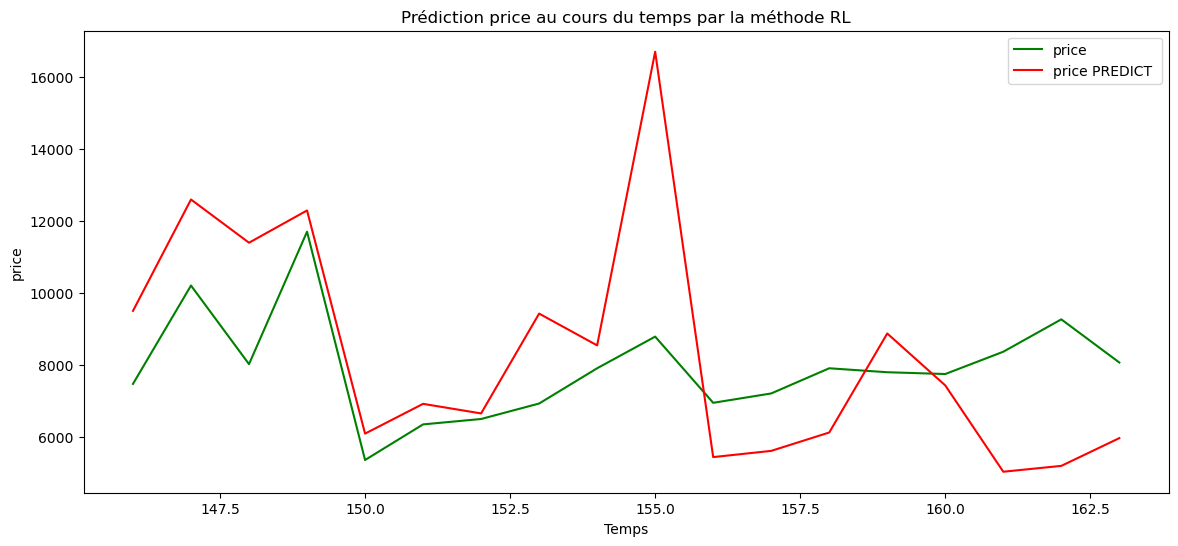

In [34]:
plt.figure(figsize=(14,6))
plt.plot(y_test, label='price', color='green')

plt.plot(predict, label='price PREDICT ', color='red')

#plt.vlines(x = 100, ymin =y_test.min()*1.2, ymax = 0.8*y_test.max(), colors = 'blue',linestyles = "solid",linewidth=10)

plt.ylabel('price')
plt.xlabel('Temps')
plt.title('Prédiction price au cours du temps par la méthode RL')
plt.legend(loc='best')
plt.show()